#### Question 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Vector Means
mu0 = np.array([[1],[0]])
mu1 = np.array([[0],[2]])

# Vector Covariance Matrices
sig0 = np.array([[8,3],[3,2]])
sig1 = np.array([[1,0.1],[0.1,1]])

# Inverse Covariance Matrices
inv_sig0 = np.linalg.inv(sig0)
inv_sig1 = np.linalg.inv(sig1)

# Covariance Matrix Determinants
det0 = np.linalg.det(sig0)
det1 = np.linalg.det(sig1)

# Linear Transformations
A0 = np.linalg.cholesky(sig0)
A1 = np.linalg.cholesky(sig1)

In [3]:
def classify(x):
  dx0 = (x-mu0)
  y0 = (-0.5*np.log(det0))-(0.5*dx0.T@inv_sig0@dx0)
  dx1 = (x-mu1)
  y1 = (-0.5*np.log(det1))-(0.5*dx1.T@inv_sig1@dx1)
  if y0 >= y1:
    return True
  else:
    return False

In [4]:
xy0 = np.zeros((1000,2))
xy1 = np.zeros((1000,2))
misclass = 0
for i in range(1000):
  x = np.random.randn(2,1)
  temp = (A0@x)+mu0
  xy0[i] = [temp[0],temp[1]]
  if classify(temp):
    misclass+=1
  x = np.random.randn(2,1)
  temp = (A1@x)+mu1
  xy1[i] = [temp[0],temp[1]]
  if not classify(temp):
    misclass+=1

<ipython-input-4-ba9f797bb53b>:7: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  xy0[i] = [temp[0],temp[1]]
<ipython-input-4-ba9f797bb53b>:12: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  xy1[i] = [temp[0],temp[1]]


In [5]:
nn = 400
x1g = np.linspace(-10, 10, nn)
x2g = np.linspace(-10, 10, nn)
decisions = -1*np.ones((nn,nn))

for i, x1 in enumerate(x1g):
  for j, x2 in enumerate(x2g):
    x = np.array([[x1],[x2]])
    if (classify(x)):
      decisions[j,i] = 1

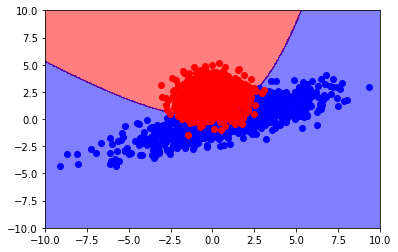

In [6]:
plt.figure()
plt.contourf(x1g, x2g, decisions,colors=['red','blue'],alpha=0.5)
plt.scatter(xy0[:,0],xy0[:,1],color='blue')
plt.scatter(xy1[:,0],xy1[:,1],color='red')

In [7]:
print("Misclassification Rate: %f" %(1-(misclass/2000)))

Misclassification Rate: 0.084500
